# IMPORT MODULES

In [1]:
from Model import *
from scipy.stats import entropy
from sklearn import preprocessing
from scipy.stats import entropy
from sklearn.metrics import accuracy_score,confusion_matrix
from utilities import *
from sklearn import metrics
from sklearn.cluster import KMeans
import copy
import torch.utils.data as Data
import utils
import sklearn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")

C:\Users\phoen\Anaconda3\envs\pytorch\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\phoen\Anaconda3\envs\pytorch\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\phoen\Anaconda3\envs\pytorch\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\phoen\Anaconda3\envs\pytorch\lib\site-packages\tensorflow\

C:\Users\phoen\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps,
C:\Users\phoen\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\least_angle.py:597: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.f

# BUILD THE DATASET

In [2]:
def get_dat(data_num):
    if data_num == 1:
        F_0 = np.load("./bearingset/data/T1_source_image.npy").transpose((0,3,1,2))/255
        F_1 = np.load("./bearingset/data/T1_target_image.npy").transpose((0,3,1,2))/255
        Y_0 = np.load("./bearingset/data/T1_source_label.npy")
        Y_1 = np.load("./bearingset/data/T1_target_label.npy")
        Label_Name =["1-OSF","2-OSP","3-ORF","4-ISF","6-IORF","7-IORP","8-H","Unknown"]
    if data_num == 2:
        F_0 = np.load("./bearingset/data/T2_source_image.npy").transpose((0,3,1,2))/255
        F_1 = np.load("./bearingset/data/T2_target_image.npy").transpose((0,3,1,2))/255
        Y_0 = np.load("./bearingset/data/T2_source_label.npy")
        Y_1 = np.load("./bearingset/data/T2_target_label.npy")
        Label_Name =["1-OSF","3-ORF","4-ISF","6-IORF","7-IORP","8-H","Unknown"]
    if data_num == 3:
        F_0 = np.load("./bearingset/data/T3_source_image.npy").transpose((0,3,1,2))/255
        F_1 = np.load("./bearingset/data/T3_target_image.npy").transpose((0,3,1,2))/255
        Y_0 = np.load("./bearingset/data/T3_source_label.npy")
        Y_1 = np.load("./bearingset/data/T3_target_label.npy")
        Label_Name =["1-OSF","2-OSP","3-ORF","4-ISF","5-IRF","Unknown"]
    if data_num == 4:
        F_0 = np.load("./bearingset/data/T4_source_image.npy").transpose((0,3,1,2))/255
        F_1 = np.load("./bearingset/data/T4_target_image.npy").transpose((0,3,1,2))/255
        Y_0 = np.load("./bearingset/data/T4_source_label.npy")
        Y_1 = np.load("./bearingset/data/T4_target_label.npy")
        Label_Name =["1-OSF","4-ISF","6-IORF","8-H","Unknown"]
    if data_num == 5:
        F_0 = np.load("./gearset/data/T1_source_image.npy").transpose((0,3,1,2))/255
        F_1 = np.load("./gearset/data/T1_target_image.npy").transpose((0,3,1,2))/255
        Y_0 = np.load("./gearset/data/T1_source_label.npy")
        Y_1 = np.load("./gearset/data/T1_target_label.npy")
        Label_Name =["1-N","3-BF&SI","4-G&E","Unknown"]
    if data_num == 6:
        F_0 = np.load("./gearset/data/T2_source_image.npy").transpose((0,3,1,2))/255
        F_1 = np.load("./gearset/data/T2_target_image.npy").transpose((0,3,1,2))/255
        Y_0 = np.load("./gearset/data/T2_source_label.npy")
        Y_1 = np.load("./gearset/data/T2_target_label.npy")
        Label_Name =["1-N","3-BF&SI","4-G&E","Unknown"]
    if data_num == 7:
        F_0 = np.load("./gearset/data/T3_source_image.npy").transpose((0,3,1,2))/255
        F_1 = np.load("./gearset/data/T3_target_image.npy").transpose((0,3,1,2))/255
        Y_0 = np.load("./gearset/data/T3_source_label.npy")
        Y_1 = np.load("./gearset/data/T3_target_label.npy")
        Label_Name =["1-N","3-BF&SI","4-G&E","Unknown"]
    F_0=torch.from_numpy(F_0.astype(np.float32))
    F_1=torch.from_numpy(F_1.astype(np.float32))
    Y_0=torch.from_numpy(Y_0.astype(np.float32))
    Y_1=torch.from_numpy(Y_1.astype(np.float32))
    data_0 = Data.TensorDataset(F_0,Y_0)
    data_1 = Data.TensorDataset(F_1,Y_1)
    return data_0,data_1,F_0,F_1,Y_0,Y_1,Label_Name
def Split(full_dataset):
    test_size = 200
    train_size = len(full_dataset) - test_size
    train_dataset, test_dataset = torch.utils.data.random_split(full_dataset, [train_size, test_size])
    return train_dataset, test_dataset

# Model Building 

## Step-1: Train the coarse classifier (Distract Stage)

In [3]:
def step_1(source_loader, target_loader,net,discriminator_coarse):
    log = Logger('./log/step_1', clear=True)
    step = 0
    acc = 0
    while step <150:
        for (i, ((im_source, label_source), (im_target, label_target))) in enumerate (zip(source_loader, target_loader)):
            fs1, feature_source, predict_prob_source = net.forward(im_source.cuda())
            ft1, feature_target, predict_prob_target = net.forward(im_target.cuda())
            coarse_source = discriminator_coarse.forward(fs1)
            coarse_target = discriminator_coarse.forward(ft1)
            ce = CrossEntropyLoss(label_source.cuda(), predict_prob_source.cuda())
            d1 = BCELossForMultiClassification(label_source[:,0:num_class].cuda(),coarse_source.cuda())
            with OptimizerManager([optimizer_net, optimizer_discriminator_coarse]):
                loss = ce + d1  
                loss.backward()
            step += 1
            log.step += 1
            if log.step % 10 == 1:
                acc_test = accuracy_score(np.argmax(predict_prob_target.cpu().detach().numpy(),axis = -1),
                                      np.argmax(label_target.cpu().detach().numpy(),axis = -1))
                if acc_test>=acc:
                    acc = acc_test
                    torch.save(net.state_dict(), './models/net.pkl')
                    torch.save(discriminator_coarse.state_dict(), './models/discriminator_coarse.pkl')
                    best_net_path = './models/net.pkl'
                    best_discriminator_path = './models/discriminator_coarse.pkl'                    
    return best_net_path,best_discriminator_path

## Initialize the minibatch number (Domain consensus score)

In [4]:
def cal_score(num_centers,feat):
    kmeans = KMeans(n_clusters=num_centers, random_state=0).fit(feat)
    center, t_codes = kmeans.cluster_centers_, kmeans.labels_
    score = sklearn.metrics.silhouette_score(feat, t_codes)
    return score 
def get_src_centers(F1,Y1,num_class):
    s_center = torch.zeros((num_class,1024)).float().cuda()
    s_feats = torch.tensor(F1)
    s_labels = torch.tensor(Y1)
    for i in s_labels.argmax(axis=1).unique():
        i_msk = s_labels.argmax(axis=1)==i
        index = i_msk.squeeze().nonzero(as_tuple=False)
        i_feat = s_feats[index, :].mean(0)
        i_feat = F.normalize(i_feat, p=2, dim=1)
        s_center[i, :] = i_feat
    return s_center, s_feats, s_labels.argmax(axis =1)
def get_tgt_centers(F2,num_class_tgt):
    t_center = torch.zeros((num_class_tgt,1024)).float().cuda()    
    t_feats = torch.tensor(F2)
    num_centers = num_class_tgt
    kmeans = KMeans(n_clusters=num_centers, random_state=0).fit(F2)
    center, t_codes = kmeans.cluster_centers_, kmeans.labels_
    t_labels = torch.tensor(t_codes)
    for i in t_labels.unique():
        i_msk = t_labels==i
        index = i_msk.squeeze().nonzero(as_tuple=False)
        i_feat = t_feats[index, :].mean(0)
        i_feat = F.normalize(i_feat, p=2, dim=1)
        t_center[i, :] = i_feat
    return t_center, t_feats, t_labels
def consensus_score(t_feats, t_codes, t_centers, s_feats, s_labels, s_centers):
    # Calculate the consensus score of cross-domain matching 
    s_centers = F.normalize(s_centers, p=2, dim=-1)
    t_centers = F.normalize(t_centers, p=2, dim=-1)
    simis = torch.matmul(s_centers, t_centers.transpose(0, 1))
    s_index = simis.argmax(dim=1)
    t_index=  simis.argmax(dim=0)
    map_s2t =  [(i, s_index[i].item()) for i in range(len(s_index))]
    map_t2s =  [(t_index[i].item(), i) for i in range(len(t_index))]
    inter = [a for a in map_s2t if a in map_t2s]
    p_score = 0.0
    filtered_inter = []
    t_score = 0.0  
    s_score = 0.0 
    scores = []
    score_dict = {}
    score_vector = torch.zeros(s_centers.shape[0]).float().cuda()
    device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
    for i,j in inter:
        si_index = (s_labels == i).squeeze().nonzero(as_tuple=False)
        tj_index = (t_labels  == j).squeeze().nonzero(as_tuple=False)
        si_feat = s_feats[si_index, :]
        tj_feat = t_feats[tj_index, :]

        s2TC =torch.matmul(si_feat.to(device), t_centers.transpose(0, 1))
        s2TC = s2TC.argmax(dim=-1)
        p_i2j = (s2TC==j).sum().float()/len(s2TC)
        t2SC = torch.matmul(tj_feat.to(device), s_centers.transpose(0, 1))
        t2SC = t2SC.argmax(dim=-1)
        p_j2i = (t2SC==i).sum().float()/len(t2SC)

        cu_score =  (p_j2i + p_i2j)/2 
        score_dict[(i,j)] = (p_j2i,  p_i2j)
        filtered_inter.append((i,j))
        t_score += p_j2i.item()
        s_score += p_i2j.item()
        p_score += cu_score.item()
        scores.append(cu_score.item())
        score_vector[i] += cu_score.item()

    score = p_score/len(filtered_inter)
    t_score = t_score/len(filtered_inter)
    s_score = s_score/len(filtered_inter)
    min_score = np.min(scores)
    return score, score_vector, filtered_inter, scores, score_dict 

## Step-2: Train the fine classifier (Distract stage)

In [5]:
def step_2(best_net_path,best_discriminator_path,batch,minibatch,source_loader,target_loader):
    net.load_state_dict(torch.load(best_net_path))
    discriminator_coarse.load_state_dict(torch.load(best_discriminator_path))
    device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
    step=0
    acc = 0
    while step <20:
        for (i, ((im_source, label_source), (im_target, label_target))) in enumerate (zip(source_loader, target_loader)):        
            fs1, feature_source, predict_prob_source = net.forward(im_source.cuda())
            ft1, feature_target, predict_prob_target = net.forward(im_target.cuda())
            p0 = discriminator_coarse.forward(fs1)
            p1_confidence = discriminator_coarse.forward(ft1)
            p1_entropy = entropy(p1_confidence.cpu().detach().numpy(),axis = 1)
            min_max_scaler = preprocessing.MinMaxScaler()
            p1_e = min_max_scaler.fit_transform(p1_entropy.reshape(-1,1)).reshape(-1)   
            # Calibrated uncertainty
            p2 = torch.max(p1_confidence,dim = -1).values+torch.tensor(1-p1_e).to(device)
            known = torch.sort(torch.tensor(p2).cuda().detach(),dim = 0)[1][-minibatch:]
            unknown = torch.sort(torch.tensor(p2).cuda().detach(),dim = 0)[1][0:minibatch]
            feature_unknown = torch.index_select(ft1, 0, unknown)
            feature_known = torch.index_select(ft1, 0, known)
            _,_,pred_unknown = discriminator_fine.forward(feature_unknown)
            _,_,pred_known = discriminator_fine.forward(feature_known)
            _, __, predict_prob_otherep = cls.forward(feature_unknown)
            ce = CrossEntropyLoss(label_source.cuda(), predict_prob_source.cuda())
            d1 = BCELossForMultiClassification(label_source[:,0:num_class].cuda(),p0.cuda())
            d2 = BCELossForMultiClassification(Variable(torch.from_numpy(np.concatenate((np.ones((minibatch,1)), np.zeros((minibatch,1))), axis = -1).astype('float32'))).cuda(),pred_unknown)
            d2 += BCELossForMultiClassification(Variable(torch.from_numpy(np.concatenate((np.zeros((minibatch,1)), np.ones((minibatch,1))), axis = -1).astype('float32'))).cuda(),pred_known)        
            ce_ep = CrossEntropyLoss(Variable(torch.from_numpy(np.concatenate((np.zeros((minibatch,num_class)), np.ones((minibatch,1))), axis = -1).astype('float32'))).cuda(),predict_prob_otherep)        
            with OptimizerManager([optimizer_net,optimizer_cls, optimizer_discriminator_coarse, optimizer_discriminator_fine]):
                loss =  ce + 0.15* d1 + 0.15*d2 + 0.1*ce_ep
                loss.backward()            
            acc_test = accuracy_score(np.argmax(predict_prob_target.cpu().detach().numpy(),axis = -1),
                                      np.argmax(label_target.cpu().detach().numpy(),axis = -1))            
            if acc_test>=acc:
                acc = acc_test                
                torch.save(discriminator_fine.state_dict(), './models/final_discriminator_fine_'+'_.pkl')
                torch.save(net.state_dict(), './models/final_source_net_'+'_.pkl')
                torch.save(discriminator_coarse.state_dict(),'./models/final_discrimintor_coarse_'+'_.pkl')
            step += 1
    discriminator_fine_path = './models/final_discriminator_fine_'+'_.pkl'
    discriminator_coarse_path =  './models/final_discrimintor_coarse_'+'_.pkl'
    net_path = './models/final_source_net_'+'_.pkl'
    return net_path,discriminator_coarse_path,discriminator_fine_path

## Step-3: Train the discriminator (Attract stage)

In [6]:
def step_3(source_loader, target_loader,discriminator,minibatch,net_path,discriminator_fine_path):
    net.load_state_dict(torch.load(net_path))
    discriminator_fine.load_state_dict(torch.load(discriminator_fine_path))    
    discriminator = LargeAdversarialNetwork(1024).cuda()

    optimizer_feature_extractor = OptimWithSheduler(optim.Adam(net.parameters(), lr=1e-5, weight_decay=5e-4),scheduler)
    optimizer_cls = OptimWithSheduler(optim.Adam(net.parameters(), lr=1e-5, weight_decay=5e-4),scheduler)
    optimizer_discriminator = OptimWithSheduler(optim.Adam(discriminator.parameters(), lr=1e-5, weight_decay=5e-4),scheduler)
    # =========================weighted adaptation of the source and target domains                            
    log = Logger('./log/TPTLN/', clear=True)
    k=0
    acc = 0
    while k <20:
        for (i, ((im_source, label_source), (im_target, label_target))) in enumerate (zip(source_loader, target_loader)):         
            fs1, feature_source, predict_prob_source = net.forward(im_source.cuda())
            ft1, feature_target, predict_prob_target = net.forward(im_target.cuda())
            domain_prob_discriminator_1_source = discriminator.forward(fs1)
            domain_prob_discriminator_1_target = discriminator.forward(ft1)
            _,_,dptarget = discriminator_fine.forward(ft1.detach())
            A = dptarget[:,1].cpu().detach().numpy()
            A = Variable(torch.tensor(A).cuda())
            ce = CrossEntropyLoss(label_source.cuda(), predict_prob_source.cuda())
            known = torch.sort(dptarget[:,1].detach(),dim =0)[1][-minibatch:]
            unknown = torch.sort(dptarget[:,1].detach(),dim =0)[1][0:minibatch]
            feature_unknown = torch.index_select(ft1, 0, unknown)
            feature_known = torch.index_select(ft1, 0, known)
            _,_,pred_unknown = discriminator_fine.forward(feature_unknown)
            _,_,pred_known = discriminator_fine.forward(feature_known)
            _, __, predict_prob_otherep = cls.forward(feature_unknown)
            ce_ep = CrossEntropyLoss(Variable(torch.from_numpy(np.concatenate((np.zeros((minibatch,num_class)), np.ones((minibatch,1))), axis = -1).astype('float32'))).cuda(),predict_prob_otherep)
            adv_loss = BCELossForMultiClassification(label=torch.ones_like(domain_prob_discriminator_1_source), predict_prob=domain_prob_discriminator_1_source )
            # with weight
            adv_loss += BCELossForMultiClassification(label=torch.ones_like(domain_prob_discriminator_1_target), predict_prob=1 - domain_prob_discriminator_1_target, instance_level_weight =A)
            with OptimizerManager([optimizer_feature_extractor,optimizer_cls,optimizer_discriminator]):
                loss = ce +0.05*adv_loss + 0.05*ce_ep
                loss.backward()
            k += 1
            acc_test = accuracy_score(np.argmax(predict_prob_target.cpu().detach().numpy(),axis = -1),
                                      np.argmax(label_target.cpu().detach().numpy(),axis = -1))            
            if acc_test>=acc:
                acc = acc_test
                torch.save(discriminator_fine.state_dict(), './models/discriminator_fine_'+'_.pkl')
                torch.save(net.state_dict(), './models/target_net_'+'_.pkl')
                final_net_path = './models/target_net_'+'_.pkl'
    return final_net_path,discriminator_fine_path

# Model training

## Dataset generating

In [7]:
task_num = 1
data_0,data_1,F_0,F_1,Y_0,Y_1,Label_Name = get_dat(task_num)
Train_0,Test_0 = Split(data_0)
Train_1,Test_1 = Split(data_1)
source_loader=Data.DataLoader(dataset=Train_0,batch_size=40,shuffle=True,num_workers=0)
target_loader=Data.DataLoader(dataset=Train_1,batch_size=40,shuffle=True,num_workers=0)
source_loader1=Data.DataLoader(dataset=Test_0,batch_size=40,shuffle=True,num_workers=0)
target_loader1=Data.DataLoader(dataset=Test_1,batch_size=40,shuffle=True,num_workers=0)
num_class = Y_0.shape[1]-1
discriminator_fine = CLS_0(1024,2).cuda()
discriminator_coarse = Discriminator(n = Y_0.shape[1]-1).cuda()
feature_extractor = CNN_2D().cuda()
cls = CLS(1024, Y_0.shape[1]).cuda()
net = nn.Sequential(feature_extractor, cls).cuda()
discriminator = LargeAdversarialNetwork(1024).cuda()

scheduler = lambda step, initial_lr : inverseDecaySheduler(step, initial_lr, gamma=10, power=0.75, max_iter=10000)
optimizer_discriminator_fine = OptimWithSheduler(optim.Adam(discriminator_fine.parameters(), lr=5e-4, weight_decay=5e-4),
                            scheduler)
optimizer_discriminator_coarse = OptimWithSheduler(optim.Adam(discriminator_coarse.parameters(), lr=5e-4, weight_decay=5e-4),
                            scheduler)
optimizer_net = OptimWithSheduler(optim.Adam(net.parameters(), lr=5e-4, weight_decay=5e-4),scheduler)
optimizer_cls = OptimWithSheduler(optim.Adam(cls.parameters(), lr=5e-4, weight_decay=5e-4),scheduler)

## Model training (3-steps)

In [8]:
## STEP-1 Coarse Classifier
src_net_path,src_discriminator_coarse_path = step_1(source_loader, target_loader,net,discriminator_coarse)
net.load_state_dict(torch.load(src_net_path))
discriminator_coarse.load_state_dict(torch.load(src_discriminator_coarse_path))
feat_s = []
feat_t = []
lab_s = []
lab_t = []
for (i, ((im_source, label_source), (im_target, label_target))) in enumerate (zip(source_loader, target_loader)):
    fs1, feature_source, predict_prob_source = net.forward(im_source.cuda())
    ft1, feature_target, predict_prob_target = net.forward(im_target.cuda())
    feat_s.append(np.array(fs1.cpu().detach().numpy()))
    feat_t.append(np.array(ft1.cpu().detach().numpy()))
    lab_s.append(np.array(label_source))
    lab_t.append(np.array(predict_prob_target.cpu().detach().numpy()))
F1 = np.array(feat_s).reshape(F_0.shape[0]-200,1024)
F2 = np.array(feat_t).reshape(F_0.shape[0]-200,1024)
Y1 = np.array(lab_s).reshape(F_0.shape[0]-200,-1)
Y2 = np.array(lab_t).reshape(F_0.shape[0]-200,-1)
J = 0
batch=40
Openness = []
Score = []
while J <21:
    s_centers, s_feats, s_labels= get_src_centers(F1,Y1,num_class)
    t_centers, t_feats, t_labels= get_tgt_centers(F2,J+num_class)
    score, score_vector, filtered_inter, scores, score_dict  = consensus_score(t_feats, t_labels, t_centers, s_feats, s_labels, s_centers)
    T = 0
    for i in range(sum(score_vector!=0).item()):
        t= score_vector[i]*sum(t_labels == filtered_inter[i][1])
        T = T + t.item()
    o = (600-T)/600
    Openness.append(o)
    Score.append(torch.sum(score_vector).cpu().detach().numpy())
    J = J+1
oo = Openness[np.argmax(np.array(Score))]
minibatch = np.round(oo * batch*0.25).astype(np.int64)

src_net_path = './models/net.pkl'
src_discriminator_coarse_path = './models/discriminator_coarse.pkl'
## STEP-2 Fine Classifier
net_path,discriminator_coarse_path,discriminator_fine_path = step_2(src_net_path,src_discriminator_coarse_path,batch,minibatch,source_loader,target_loader)
## STEP-3 Discriminator
final_net_path,discriminator_fine_path = step_3(source_loader, target_loader,discriminator,minibatch,net_path,discriminator_fine_path)

# Model testing

## The confusion matrix

[Text(0, 0.5, '1-OSF'),
 Text(0, 1.5, '2-OSP'),
 Text(0, 2.5, '3-ORF'),
 Text(0, 3.5, '4-ISF'),
 Text(0, 4.5, '6-IORF'),
 Text(0, 5.5, '7-IORP'),
 Text(0, 6.5, '8-H'),
 Text(0, 7.5, 'Unknown')]

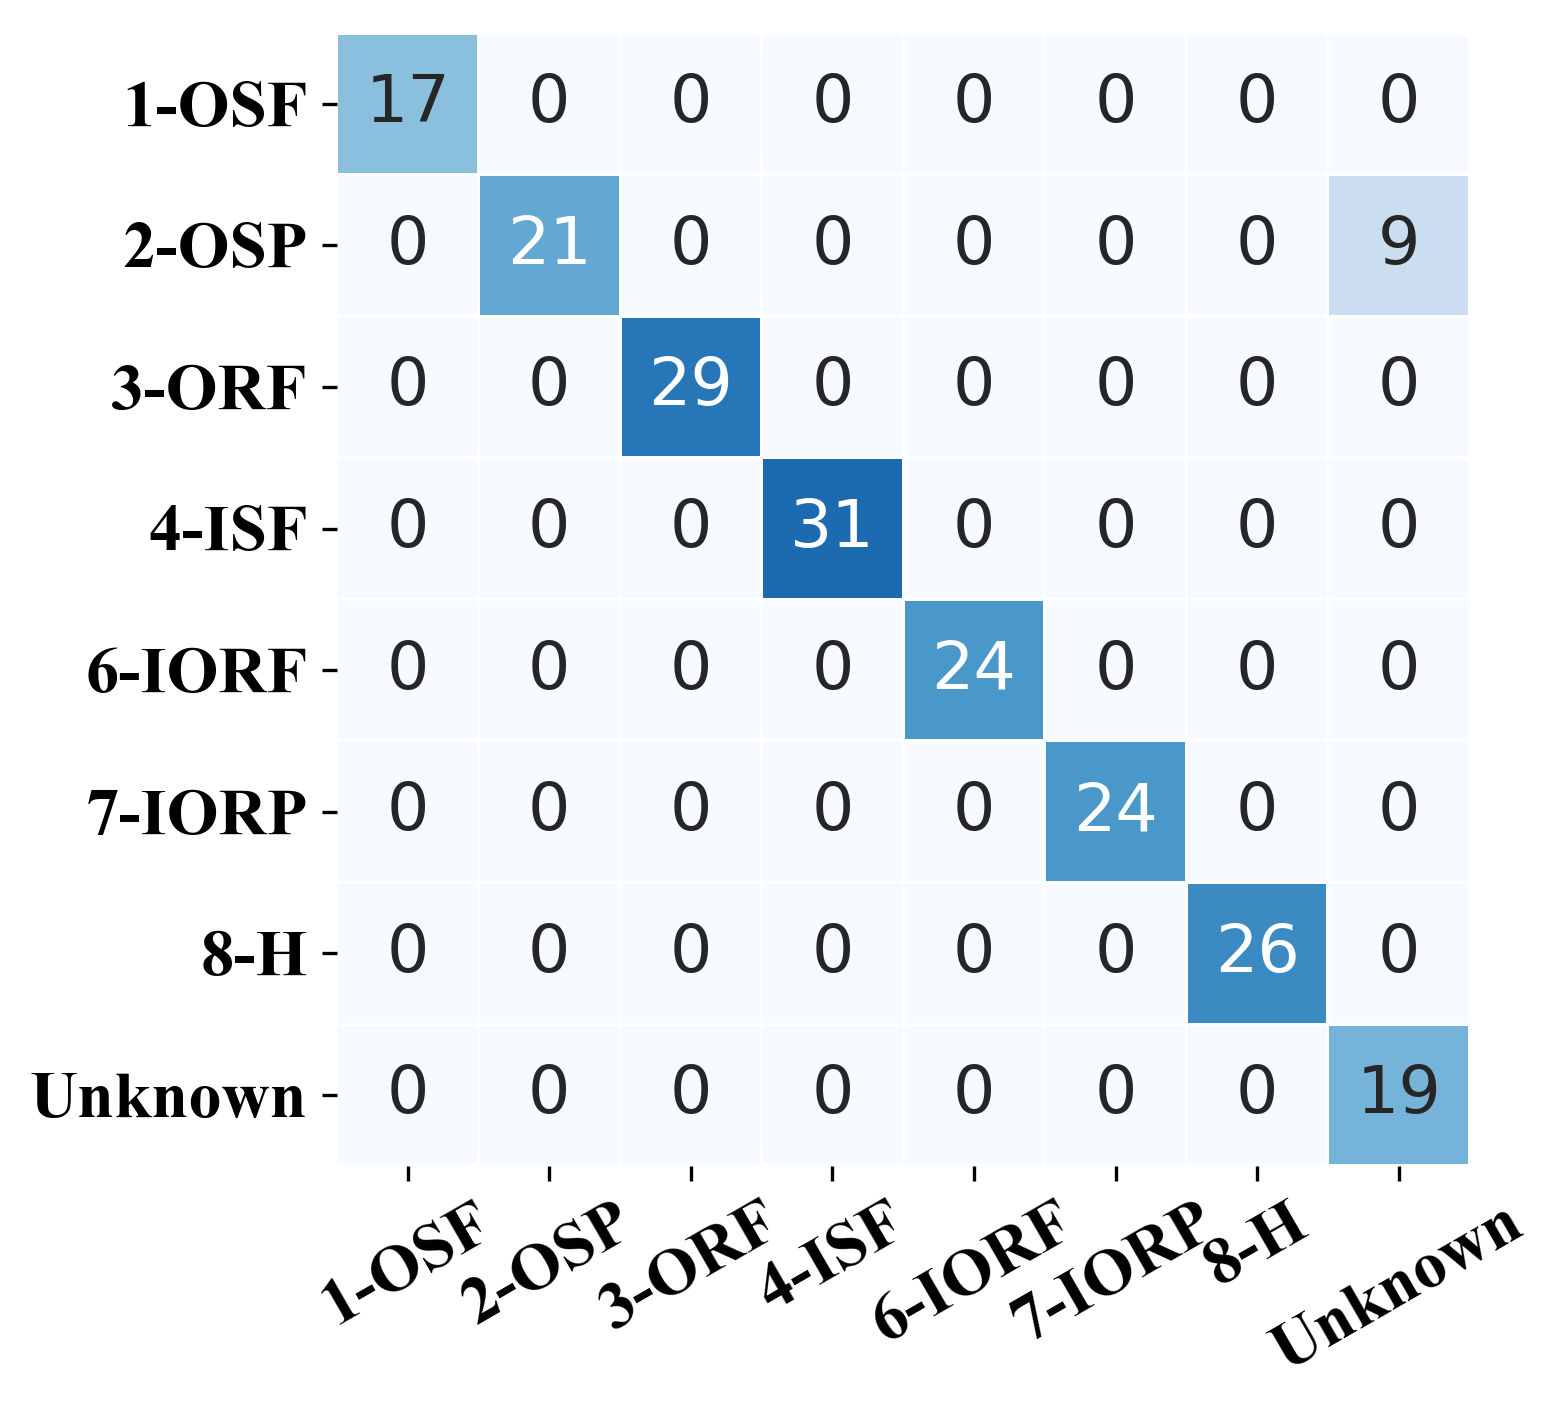

In [9]:
net.load_state_dict(torch.load('./models/target_net__.pkl'))
# Visualize the confusion matrix
True_label = []
Pred_Label = []
for (i, (im, label)) in enumerate(target_loader1):
    ss, _,  predict_prob = net.forward(im.cuda())    
    label = np.argmax(label, axis=-1).reshape(-1, 1)
    predict_index = np.argmax(predict_prob.cpu().detach().numpy(), axis=-1).reshape(-1, 1)    
    True_label.append(np.array(label.flatten()))
    Pred_Label.append(np.array(predict_index.flatten()))
y_true = np.array(True_label).reshape((200,))
y_pred = np.array(Pred_Label).reshape((200,))
m = confusion_matrix(y_true,y_pred)
f, ax = plt.subplots(figsize=(5,5),dpi=300)
ax= sns.heatmap(m,vmin=0, vmax=40,cmap='Blues',annot=True,fmt='',linewidths=.5,square=True,cbar=None,annot_kws={"size":16})
plt.xticks(fontsize= 16, fontfamily= "Times New Roman")                      
plt.yticks(fontsize= 16, fontfamily= "Times New Roman") 
plt.margins(0, 0)
ax.set_xticklabels(Label_Name,rotation=30)
ax.set_yticklabels(Label_Name,rotation=0)

## The accuracy

In [15]:
pred_y = []
true_y = []
NUM_CLASSES = Y_1.shape[1]
with torch.no_grad():
    for batch_idx, (data, target) in enumerate(target_loader1):
        data, target = data.cuda(), target.cuda(non_blocking=True)
        ss, _,  predict_prob = net(data)
        pred = predict_prob.max(1, keepdim=True)[1] 
        for i in range(len(pred)):
            pred_y.append(pred[i].item())
            true_y.append(torch.argmax(target[i]).item())
a,b = utils.cal_acc(true_y, pred_y, NUM_CLASSES)
print("The accuracy on all the known classes: "+str(a))
print("The accuracy on all the target classes: "+str(b))

The accuracy on all the known classes: 0.95
The accuracy on all the target classes: 0.9447513812154696
